<a href="https://colab.research.google.com/github/hufsaim/T10306201/blob/master/notebook_2022/Lab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io
from skimage.color import rgb2gray
from skimage import transform as tf


In [2]:
myfigsize = (6,4)

## Read Images from Disk

In [3]:
myfolder = '/content/drive/MyDrive/class/DIP1/2022/image'
img1 = os.path.join(myfolder,'d01.png')
img2 = os.path.join(myfolder,'d02.png')
print(img1)
print(img2)
I1 = rgb2gray(io.imread(img1))
I2 = rgb2gray(io.imread(img2))

/content/drive/MyDrive/class/DIP1/2022/image/d01.png
/content/drive/MyDrive/class/DIP1/2022/image/d02.png


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  import sys


## Read Images from Web

In [4]:
img1_url = 'https://raw.githubusercontent.com/hufsaim/T10306201/master/image/d01.png'
img2_url = 'https://raw.githubusercontent.com/hufsaim/T10306201/master/image/d02.png'
I1 = rgb2gray(io.imread(img2_url))
I2 = rgb2gray(io.imread(img1_url))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  after removing the cwd from sys.path.


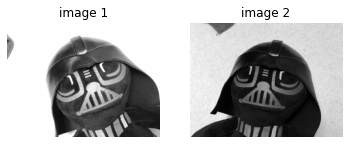

In [5]:
plt.figure(figsize=myfigsize)
plt.subplot(121)
plt.imshow(I1,cmap='gray')
plt.axis('off')
plt.title('image 1')
plt.subplot(122)
plt.imshow(I2,cmap='gray')
plt.axis('off')
plt.title('image 2')
plt.show()

## Image Negative

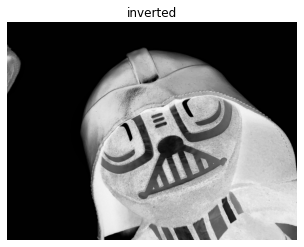

In [6]:
I_neg = np.max(I1) - I1
plt.figure(figsize=myfigsize)
plt.imshow(I_neg,cmap='gray')
plt.axis('off')
plt.title('inverted')
plt.show()

## Image Subtraction

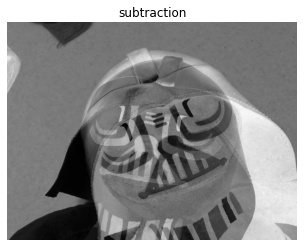

In [7]:
I_sub = I2 - I1
plt.figure(figsize=myfigsize)
plt.imshow(I_sub,cmap='gray')
plt.axis('off')
plt.title('subtraction')
plt.show()

# Interpolations




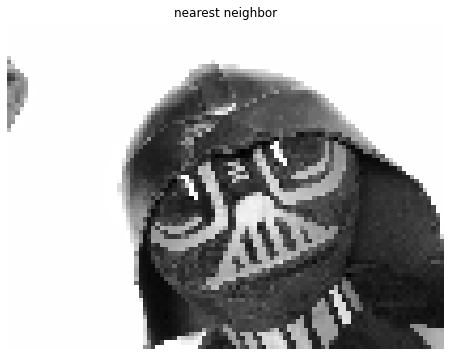

In [8]:
Ts = 10
I_low = I1[::Ts,::Ts]
plt.figure(figsize=(9,6))
plt.imshow(I_low,cmap='gray',interpolation='nearest')
plt.title('nearest neighbor')
plt.axis('off')
plt.show()

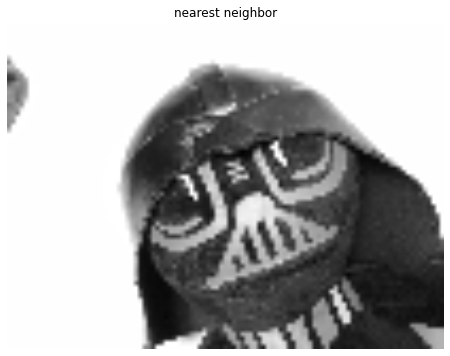

In [9]:
plt.figure(figsize=(9,6))
plt.imshow(I_low,cmap='gray',interpolation='bilinear')
plt.title('nearest neighbor')
plt.axis('off')
plt.show()

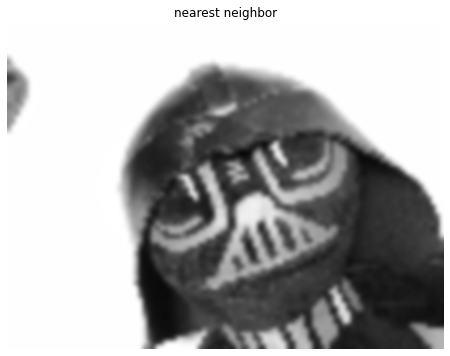

In [10]:
plt.figure(figsize=(9,6))
plt.imshow(I_low,cmap='gray',interpolation='bicubic')
plt.title('nearest neighbor')
plt.axis('off')
plt.show()

# Affine transform

### Identity

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


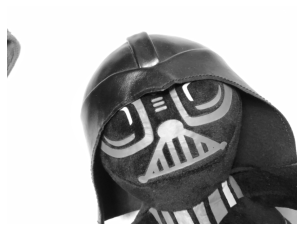

In [11]:
I = np.eye(3)
print(I)

plt.figure(figsize=myfigsize)
plt.imshow(tf.warp(I1,I),cmap='gray')
plt.axis('off')
plt.show()

### scaling

[[2. 0. 0.]
 [0. 2. 0.]
 [0. 0. 1.]]


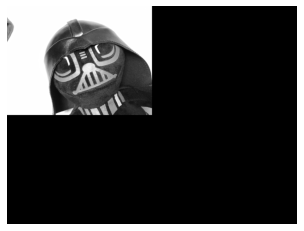

In [12]:
S = np.eye(3)
S[0,0] = 2
S[1,1] = 2
print(S)

plt.figure(figsize=myfigsize)
plt.imshow(tf.warp(I1,S),cmap='gray')
plt.axis('off')
plt.show()

### rotation

[[ 0.8660254 -0.5        0.       ]
 [ 0.5        0.8660254  0.       ]
 [ 0.         0.         1.       ]]


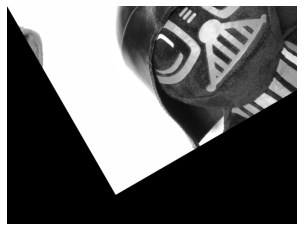

In [13]:
theta = 30 * np.pi/180.0
R = np.eye(3)
R[0,0] = np.cos(theta)
R[0,1] = -np.sin(theta)
R[1,0] = np.sin(theta)
R[1,1] = np.cos(theta)
print(R)

plt.figure(figsize=myfigsize)
plt.imshow(tf.warp(I1,R),cmap='gray')
plt.axis('off')
plt.show()

### translation

[[   1.    0. -256.]
 [   0.    1. -128.]
 [   0.    0.    1.]]


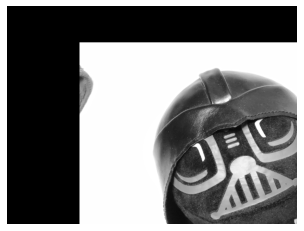

In [14]:
T = np.eye(3)
T[0,2] = -256
T[1,2] = -128
print(T)

plt.figure(figsize=myfigsize)
plt.imshow(tf.warp(I1,T),cmap='gray')
plt.axis('off')
plt.show()

### Shearing

[[1.   0.25 0.  ]
 [0.   1.   0.  ]
 [0.   0.   1.  ]]


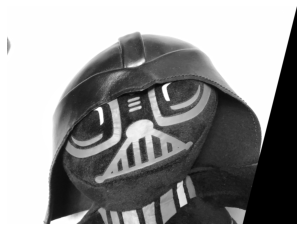

In [15]:
Sh = np.eye(3)
Sh[0,1] = 0.25
Sh[1,0] = 0
print(Sh)

plt.figure(figsize=myfigsize)
plt.imshow(tf.warp(I1,Sh),cmap='gray')
plt.axis('off')
plt.show()

### All together

In [16]:
A = np.dot(np.dot(np.dot(R,S),T),Sh)
print(A)

[[   1.73205081   -0.5669873  -315.40500674]
 [   1.            1.98205081 -477.70250337]
 [   0.            0.            1.        ]]


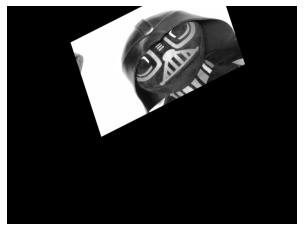

In [17]:
plt.figure(figsize=myfigsize)
plt.imshow(tf.warp(I1,A),cmap='gray')
plt.axis('off')
plt.show()

## Registration

In [18]:
sx = 1
sy = 1
tx = -250
ty = 210
theta = -32 * np.pi/180.0

S = np.eye(3)
S[0,0] = sx
S[1,1] = sy

R = np.eye(3)
R[0,0] = np.cos(theta)
R[0,1] = -np.sin(theta)
R[1,0] = np.sin(theta)
R[1,1] = np.cos(theta)

T = np.eye(3)
T[0,2] = tx
T[1,2] = ty

A = np.dot(S,np.dot(R,T))

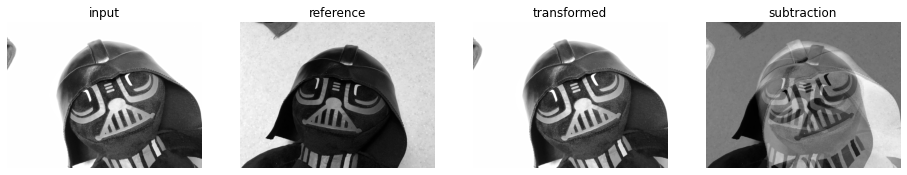

In [19]:
I1_moved = tf.warp(I1,I)

plt.figure(figsize=(16,4))
plt.subplot(141)
plt.imshow(I1,cmap='gray')
plt.axis('off')
plt.title('input')
plt.subplot(142)
plt.imshow(I2,cmap='gray')
plt.axis('off')
plt.title('reference')
plt.subplot(143)
plt.imshow(I1_moved,cmap='gray')
plt.axis('off')
plt.title('transformed')
plt.subplot(144)
plt.imshow(I2-I1_moved,cmap='gray')
plt.axis('off')
plt.title('subtraction')
plt.show()

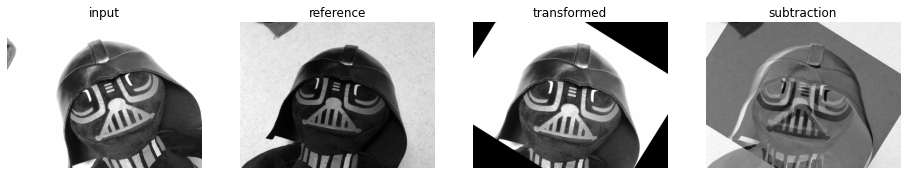

In [20]:
I1_moved = tf.warp(I1,A)

plt.figure(figsize=(16,4))
plt.subplot(141)
plt.imshow(I1,cmap='gray')
plt.axis('off')
plt.title('input')
plt.subplot(142)
plt.imshow(I2,cmap='gray')
plt.axis('off')
plt.title('reference')
plt.subplot(143)
plt.imshow(I1_moved,cmap='gray')
plt.axis('off')
plt.title('transformed')
plt.subplot(144)
plt.imshow(I2-I1_moved,cmap='gray')
plt.axis('off')
plt.title('subtraction')
plt.show()